# SVC

In [9]:
from cardio_datasets import full_dataset, reduced_dataset, categorial_dataset, continuous_dataset
from model_selection_and_evaluation_functions import create_train_test_eval_split, search_score_and_evalute_parameters, show_classification_evaluation_metrics

import joblib
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

## Datasets

In [2]:
categorial_dataset_X_y = create_train_test_eval_split(categorial_dataset, 'cardio')
continuous_dataset_X_y = create_train_test_eval_split(continuous_dataset, 'cardio')
full_dataset_X_y = create_train_test_eval_split(full_dataset, 'cardio')
reduced_dataset_X_y = create_train_test_eval_split(reduced_dataset, 'cardio')

## Hyper parameter tuning

In [3]:
BaseLinearSVC = LinearSVC(max_iter=100000, random_state=1338)

In [4]:
LinearSVC_grid_parameters_1 = {
    "LinearSVC__C": [0.001, 0.01, 0.1, 1, 10],
}

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7279
           1       0.75      0.66      0.70      6938

    accuracy                           0.73     14217
   macro avg       0.73      0.72      0.72     14217
weighted avg       0.73      0.73      0.72     14217



,param_LinearSVC__C,mean_test_score,std_test_score
0,0.001,0.654805,0.015236
1,0.01,0.654805,0.014683
2,0.1,0.654623,0.014489
3,1,0.654623,0.014489
4,10,0.654623,0.014489


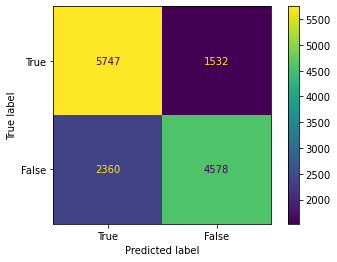

In [5]:
LinearSVC_StandardScaler_pipeline = Pipeline(
    [
        ("StandardScaler", StandardScaler()),
        ("LinearSVC", BaseLinearSVC),
    ]
)
(
    LinearSVC_model_1,
    LinearSVC_model_1_scores,
    LinearSVC_model_1_scores_raw,
) = search_score_and_evalute_parameters(
    reduced_dataset_X_y["eval_split"]["X_train"],
    reduced_dataset_X_y["eval_split"]["X_test"],
    reduced_dataset_X_y["eval_split"]["y_train"],
    reduced_dataset_X_y["eval_split"]["y_test"],
    LinearSVC_StandardScaler_pipeline,
    LinearSVC_grid_parameters_1,
    "recall",
)
LinearSVC_model_1_scores

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7279
           1       0.75      0.66      0.70      6938

    accuracy                           0.72     14217
   macro avg       0.73      0.72      0.72     14217
weighted avg       0.73      0.72      0.72     14217



,param_LinearSVC__C,mean_test_score,std_test_score
0,0.01,0.659246,0.014573
1,0.1,0.655474,0.015102
2,1,0.654805,0.014676
3,10,0.654623,0.014489
4,0.001,0.635341,0.014796


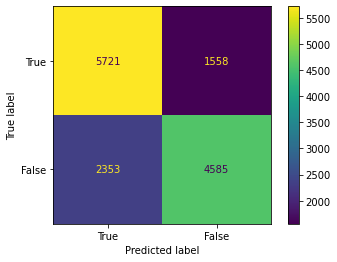

In [7]:
LinearSVC_MinMaxScaler_pipeline = Pipeline(
    [
        ("MinMaxScaler", MinMaxScaler()),
        ("LinearSVC", BaseLinearSVC),
    ]
)
(
    LinearSVC_model_2,
    LinearSVC_model_2_scores,
    LinearSVC_model_2_scores_raw,
) = search_score_and_evalute_parameters(
    reduced_dataset_X_y["eval_split"]["X_train"],
    reduced_dataset_X_y["eval_split"]["X_test"],
    reduced_dataset_X_y["eval_split"]["y_train"],
    reduced_dataset_X_y["eval_split"]["y_test"],
    LinearSVC_MinMaxScaler_pipeline,
    LinearSVC_grid_parameters_1,
    "recall",
)
LinearSVC_model_2_scores

In [10]:
joblib.dump(LinearSVC_model_2, './models/eval/LinearSVC_model_2.joblib')

['./models/LinearSVC_model_2.joblib']